# 涉及到的数据集包括：CIFAR10DVS，DVS128Gesture
[参考链接1](https://spikingjelly.readthedocs.io/zh-cn/latest/activation_based/neuromorphic_datasets.html)  
[cifar10dvs数据集加载问题解决](https://github.com/fangwei123456/spikingjelly/issues/370)

### 1.预处理 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [3]:
from spikingjelly.datasets.cifar10_dvs import CIFAR10DVS
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture

# download True
print('CIFAR10-DVS downloadable', CIFAR10DVS.downloadable())
print('resource, url, md5/n', CIFAR10DVS.resource_url_md5())

# download Fasle
print('DVS128Gesture downloadable', DVS128Gesture.downloadable())
print('resource, url, md5/n', DVS128Gesture.resource_url_md5())

CIFAR10-DVS downloadable True
resource, url, md5/n [('airplane.zip', 'https://ndownloader.figshare.com/files/7712788', '0afd5c4bf9ae06af762a77b180354fdd'), ('automobile.zip', 'https://ndownloader.figshare.com/files/7712791', '8438dfeba3bc970c94962d995b1b9bdd'), ('bird.zip', 'https://ndownloader.figshare.com/files/7712794', 'a9c207c91c55b9dc2002dc21c684d785'), ('cat.zip', 'https://ndownloader.figshare.com/files/7712812', '52c63c677c2b15fa5146a8daf4d56687'), ('deer.zip', 'https://ndownloader.figshare.com/files/7712815', 'b6bf21f6c04d21ba4e23fc3e36c8a4a3'), ('dog.zip', 'https://ndownloader.figshare.com/files/7712818', 'f379ebdf6703d16e0a690782e62639c3'), ('frog.zip', 'https://ndownloader.figshare.com/files/7712842', 'cad6ed91214b1c7388a5f6ee56d08803'), ('horse.zip', 'https://ndownloader.figshare.com/files/7712851', 'e7cbbf77bec584ffbf913f00e682782a'), ('ship.zip', 'https://ndownloader.figshare.com/files/7712836', '41c7bd7d6b251be82557c6cce9a7d5c9'), ('truck.zip', 'https://ndownloader.figs

对cifar10DVS数据集操作

In [53]:
root_dir = r'../data/CIFAR10DVS'
T = 5
data1 = CIFAR10DVS(root = root_dir, data_type='frame', frames_number=T, split_by='number')
T = 20
data2 = CIFAR10DVS(root = root_dir, data_type='frame', frames_number=T, split_by='number')
# cifar10数据调用默认的代码无法转换为event数据，即使查看源码并进行属性的调用也不行。 
# 需要进行一行代码的更改，具体查看 typora中 的电脑配环境的一些问题中

The directory [../data/CIFAR10DVS\frames_number_5_split_by_number] already exists.
The directory [../data/CIFAR10DVS\frames_number_20_split_by_number] already exists.


In [59]:
len(data1)
len(data2)
data1[0][0].shape
data2[0][0].shape

10000

10000

(5, 2, 128, 128)

(20, 2, 128, 128)

对DVS128Gesture数据集操作

In [5]:
root_dir = r'../data/DVS128Gesture'
train_set = DVS128Gesture(root_dir, train=True, data_type='event')
test_set = DVS128Gesture(root_dir, train=False, data_type='event')

同级目录下会多出一个 events_np 文件夹，其中包含训练集和测试集：

In [6]:
train_set
test_set

Dataset DVS128Gesture
    Number of datapoints: 1176
    Root location: ../data/DVS128Gesture\events_np\train

Dataset DVS128Gesture
    Number of datapoints: 288
    Root location: ../data/DVS128Gesture\events_np\test

其中 event 使用字典格式存储Events数据，键为 ['t', 'x', 'y', 'p']；label 是数据的标签，DVS128 Gesture共有11类。

In [41]:
event, label = train_set[96]
for k in event.keys():
    print(k, event[k])
print('label', label)

t [46358833 46358846 46358898 ... 53018506 53018529 53018736]
x [113  44  76 ...  64  51  56]
y [ 66 108  93 ...  89  82  87]
p [1 0 0 ... 1 1 1]
label 0


In [64]:
from collections import Counter
len(event['t'])
len(Counter(event['t']))
# Counter(event['t'])

178394

167433

获取Frame数据, 运行后，同级目录下会出现 frames_number_20_split_by_number 文件夹，这里存放了积分生成的Frame数据。这里的20就是时间步了。

In [60]:
train_set = DVS128Gesture(root_dir, train=True, data_type='frame', frames_number=20, split_by='number')
test_set = DVS128Gesture(root_dir, train=False, data_type='frame', frames_number=20, split_by='number')

AssertionError: 

In [52]:
len(train_set)
frame, label = train_set[0]
print(frame.shape)
print(label)

1176

(20, 2, 128, 128)
0


在jupyter中显示不了动图，测试了一个其它方法也没用

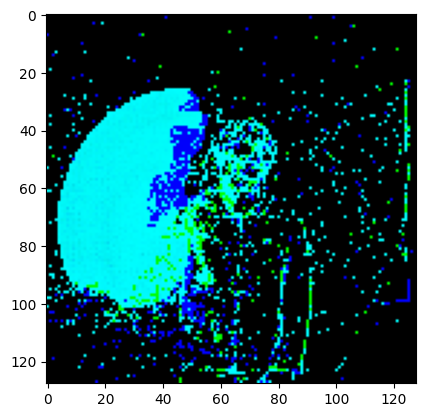

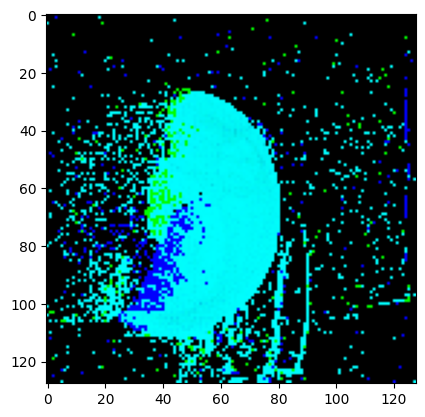

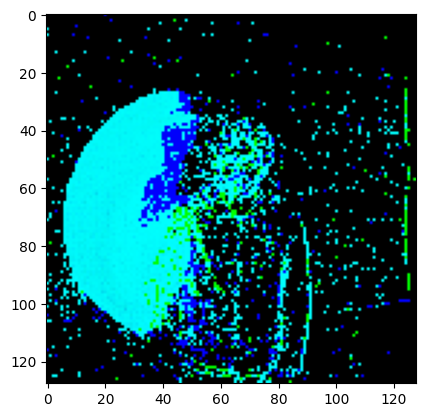

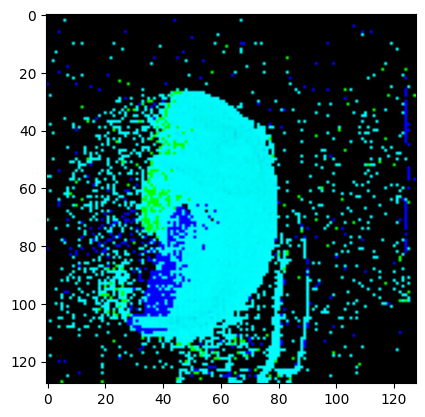

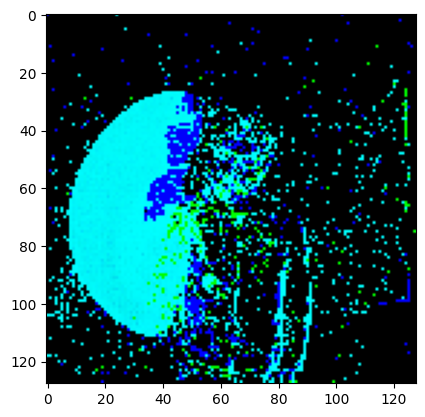

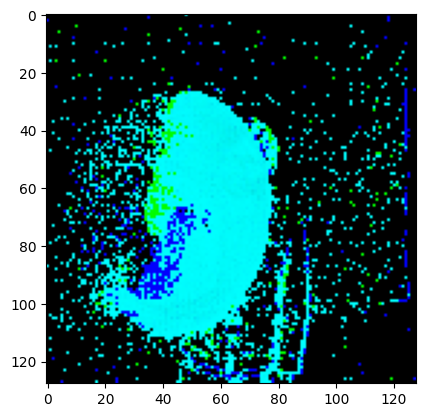

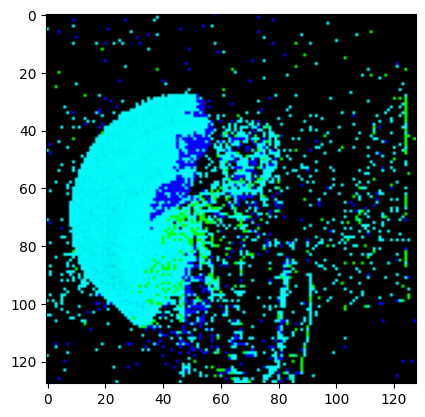

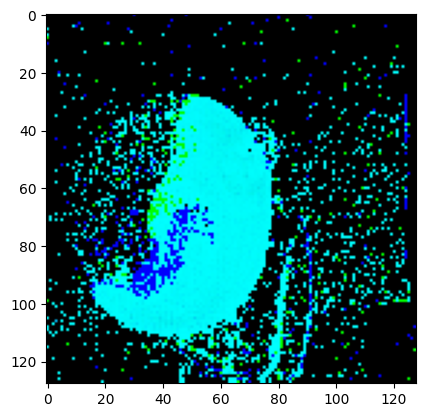

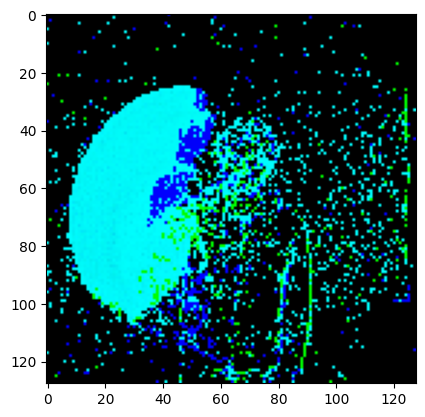

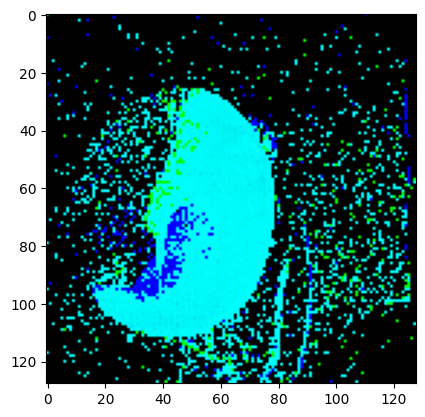

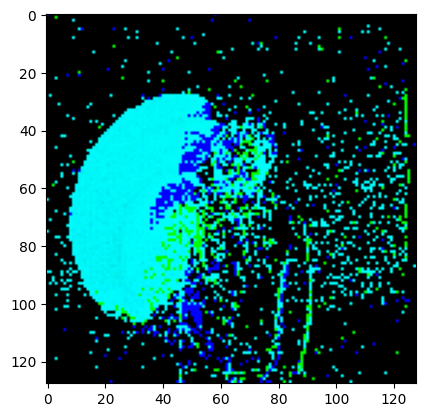

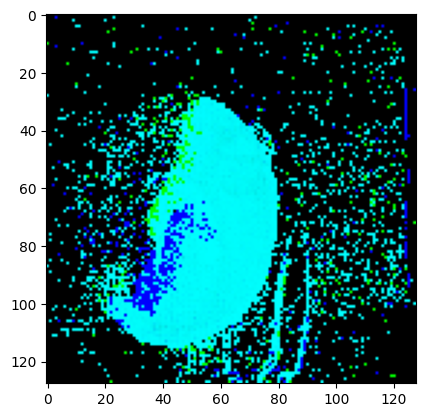

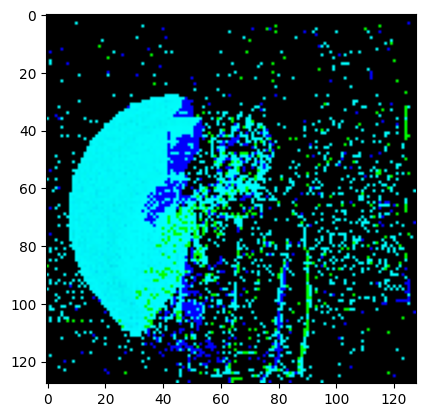

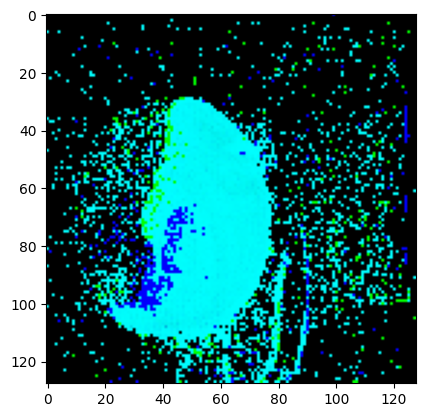

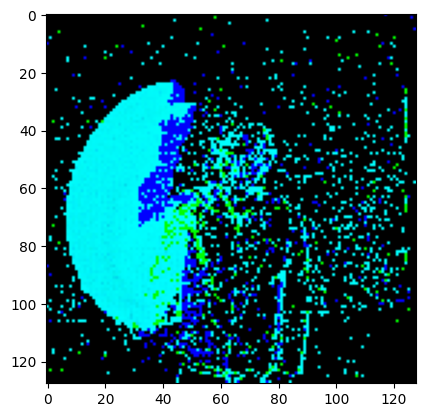

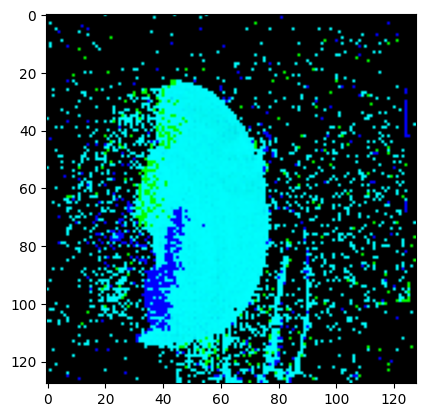

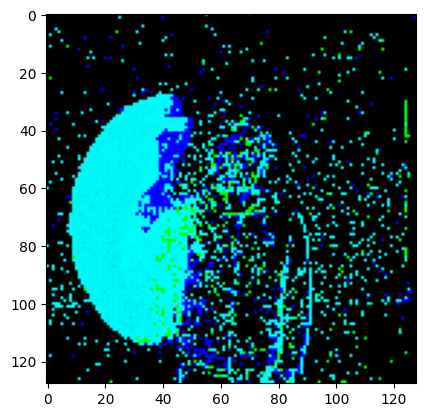

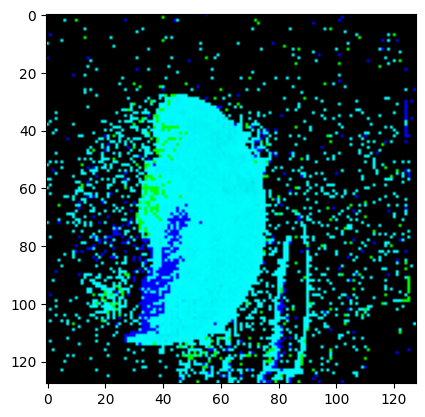

KeyboardInterrupt: 

In [12]:
from spikingjelly.datasets import play_frame
frame, label = train_set[500]
play_frame(frame)
# from IPython.display import display
# for img in play_frame(frame):
#     display(img)
#     time.sleep(5)

将数据按照时间划分后，考虑到长度不一致，故使用掩码进行表示，长度不足最大长度的位置，均为0

In [27]:
from spikingjelly.datasets.cifar10_dvs import CIFAR10DVS
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
root_dir = r'../data/DVS128Gesture'                             
train_set = DVS128Gesture(root_dir, data_type='frame', duration=1000000, train=True)

The directory [../data/DVS128Gesture\duration_1000000] already exists.


In [16]:
train_set[0][0].shape

(6, 2, 128, 128)

In [28]:
train_set = DVS128Gesture(root_dir, data_type='frame', duration=10000000, train=True)
train_set[0][0].shape

The directory [../data/DVS128Gesture\duration_10000000] already exists.


(1, 2, 128, 128)

In [29]:
import torch
from torch.utils.data import DataLoader
from spikingjelly.datasets import pad_sequence_collate, padded_sequence_mask, dvs128_gesture

root_dir = r'../data/DVS128Gesture'
train_set = dvs128_gesture.DVS128Gesture(root_dir, data_type='frame', duration=1000000, train=True)
for i in range(5):
    x, y = train_set[i]
    print(f'x[{i}].shape=[T, C, H, W]={x.shape}')
train_data_loader = DataLoader(train_set, collate_fn=pad_sequence_collate, batch_size=5)
for x, y, x_len in train_data_loader:
    print(f'x.shape=[N, T, C, H, W]={tuple(x.shape)}')
    print(f'x_len={x_len}')
    mask = padded_sequence_mask(x_len)  # mask.shape = [T, N]
    print(f'mask=\n{mask.t().int()}')
    break

The directory [../data/DVS128Gesture\duration_1000000] already exists.
x[0].shape=[T, C, H, W]=(6, 2, 128, 128)
x[1].shape=[T, C, H, W]=(6, 2, 128, 128)
x[2].shape=[T, C, H, W]=(5, 2, 128, 128)
x[3].shape=[T, C, H, W]=(5, 2, 128, 128)
x[4].shape=[T, C, H, W]=(7, 2, 128, 128)
x.shape=[N, T, C, H, W]=(5, 7, 2, 128, 128)
x_len=tensor([6, 6, 5, 5, 7])
mask=
tensor([[1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)


In [30]:
x_len

tensor([6, 6, 5, 5, 7])